# Garbage Classification

## Dataset: [TrashNet](https://www.kaggle.com/asdasdasasdas/garbage-classification) 

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D,Dense,Dropout
from tensorflow.keras.models  import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import matplotlib.pyplot as plt
def plot_imgs(item_dir, top=10):
    all_item_dirs = os.listdir(item_dir)
    item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(item_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

In [ ]:
import os
print(os.listdir('../input/garbage-classification/garbage classification/Garbage classification'))

In [ ]:
data_path = '../input/garbage-classification/garbage classification/Garbage classification'

In [ ]:
plot_imgs(data_path+'/cardboard')

In [ ]:
plot_imgs(data_path+'/glass')

In [ ]:
plot_imgs(data_path+'/paper')

In [ ]:
plot_imgs(data_path+'/plastic')

In [ ]:
plot_imgs(data_path+'/metal')

In [ ]:
plot_imgs(data_path+'/trash')

## Data Generator

In [ ]:
batch_size = 32

In [ ]:
# Data Generator
train=ImageDataGenerator(horizontal_flip=True, vertical_flip=True,validation_split=0.1,rescale=1./255,
                         shear_range = 0.1,zoom_range = 0.1,
                         width_shift_range = 0.1,
                         height_shift_range = 0.1,)

test=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_generator=train.flow_from_directory(data_path,target_size=(512,384),batch_size=batch_size,class_mode='categorical',subset='training')

test_generator=test.flow_from_directory(data_path,target_size=(512,384),batch_size=batch_size,class_mode='categorical',subset='validation')

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

## Build Model

In [ ]:
num_classes = 6

In [ ]:
# Build Model
model = Sequential()
   
model.add(Conv2D(32,(3,3), padding='same', input_shape=(512,384,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(64,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.summary()

In [ ]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train Model

In [ ]:
model_path="garbage_cnn.h5"
#checkpoint1 = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
#callbacks_list = [checkpoint1]

In [ ]:
num_epochs = 200
step_size_train=train_generator.n//train_generator.batch_size
step_size_test =test_generator.n//test_generator.batch_size

In [ ]:
# Train Model
history = model.fit_generator(train_generator, epochs=num_epochs, steps_per_epoch=step_size_train,validation_data=test_generator,
                    validation_steps=step_size_test)#,callbacks=callbacks_list)

## Evaluate Model

In [ ]:
# Evaluate Model
score = model.evaluate_generator(test_generator, steps=step_size_test)
print(score)

## Training History

In [ ]:
# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')

## Paper: [Fine-Tuning Models Comparisons on Garbage Classification for Recyclebility](https://arxiv.org/ftp/arxiv/papers/1908/1908.04393.pdf)

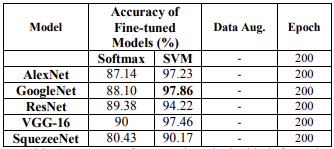

## Paper: [Comparative Analysis of Multiple Deep CNN Models for Waste Classification](https://arxiv.org/pdf/2004.02168.pdf)
### ResNet18 performance is best (accuracy=87%)
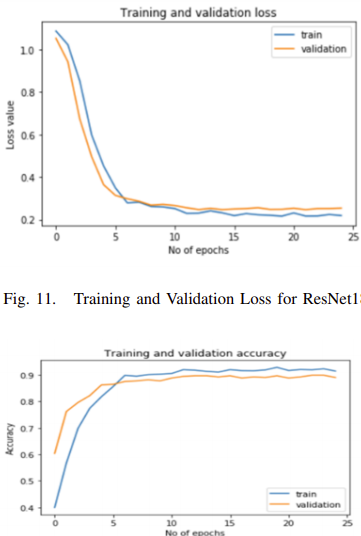
